# Ford GoBike
## Alphonse Emmanuel Y Boudouin

## Introduction
### The FordGoBike dataset  includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
### In this first part of my project, i will do the exploration of my dataset. Of course, before exploring the data, i will do some wrangling.
### Let's go !



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time

%matplotlib inline

In [2]:
df= pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.shape

(183412, 16)

In [5]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [8]:
df.duplicated().sum()

0

### Define

#### Some datatypes are wrong, so i'm going to change them; I will first make a copy of my dataset before cleaning it

In [9]:
df_clean= df.copy()

### Code

In [10]:
df_clean['start_time']= pd.to_datetime(df_clean['start_time'])
df_clean['end_time']= pd.to_datetime(df_clean['end_time'])

In [11]:
df_clean['user_type']= df_clean['user_type'].astype('category')

### Test

In [12]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

### Define

#### I want to extract age from the member_birth_year column. It will be important for me in the exploring part. Why? i will show it later

### Code

In [13]:
df_clean['age']= df_clean['member_birth_year'].apply(lambda x: 2019 - x)

### Test

In [14]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0


In [15]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
age                               float64
dtype: object

In [16]:
df_clean['age'].describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

### Define

#### now i want to find more data about the starting hour,day, period of the day, also the duration in min.These informations would be signififcant for the exploring i'm planning to do

### Code

In [17]:
df_clean['start_hour']= df_clean['start_time'].apply(lambda time: time.hour)
df_clean['duration_min']= df_clean['duration_sec'] / 60
df_clean['start_date']= df_clean['start_time'].dt.strftime('%Y-%m-%d')
df_clean['start_day']= df_clean['start_time'].dt.strftime('%A')
df_clean['day_period']='Morning'
df_clean['day_period'][(df_clean['start_hour']>= 12) & (df_clean['start_hour']<= 17)] = 'Afternoon'
df_clean['day_period'][(df_clean['start_hour']>= 18) & (df_clean['start_hour']<= 23)] = 'Night'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


### Test

In [18]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_hour,duration_min,start_date,start_day,day_period
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,35.0,17,869.750000,2019-02-28,Thursday,Afternoon
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,NaN,No,NaN,18,708.683333,2019-02-28,Thursday,Night
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,47.0,12,1030.900000,2019-02-28,Thursday,Afternoon
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,30.0,17,608.166667,2019-02-28,Thursday,Afternoon
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,45.0,23,26.416667,2019-02-28,Thursday,Night


### Define

#### Drop the member_birth_year column, i already have their age

#### Code

In [19]:
df_clean.drop(['member_birth_year'], axis=1, inplace=True)

#### Test

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 21 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null category
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
age                        175147 non-null float64
start_hour                 183412 non-null int64
duration_min     

In [21]:
df_clean.shape

(183412, 21)

### Save the clean data

In [22]:
df_clean.to_csv('201902-fordgobike-tripdata_cleaned.csv', index=None)

In [23]:
df_cleaned= pd.read_csv('201902-fordgobike-tripdata_cleaned.csv')

In [24]:
df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_gender,bike_share_for_all_trip,age,start_hour,duration_min,start_date,start_day,day_period
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,Male,No,35.0,17,869.750000,2019-02-28,Thursday,Afternoon
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,No,NaN,18,708.683333,2019-02-28,Thursday,Night
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,Male,No,47.0,12,1030.900000,2019-02-28,Thursday,Afternoon
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,Other,No,30.0,17,608.166667,2019-02-28,Thursday,Afternoon
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,Male,Yes,45.0,23,26.416667,2019-02-28,Thursday,Night


### What is the structure of your dataset?

#### My dataset has 183412 rows and 21 columns

### What is/are the main feature(s) of interest in your dataset?

#### I will mostly look for relations between features, like the most popular bike station? when are the most trips taken? if it depends on the user_type? Also in term of hour, the day, the day period? . So, my goal here is to see the dependencies, correlations,  between my features based on the trips duration. I will also use the two different type of station to see their impact on the trips

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

#### user_type, start_hour, start_day, day_period,  duration min or sec, start and end station name(top10) 

## Univariate Exploration

### I will start looking for each distributions based on start day, and day period

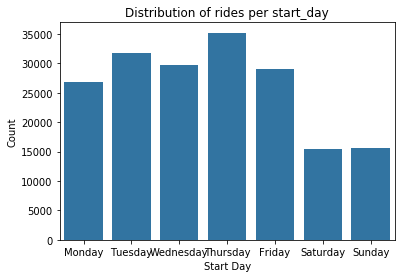

In [25]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_cleaned['start_day'] = df_cleaned['start_day'].astype(weekdaycat)

base_color = sb.color_palette()[0]
def countplot(data,x,xlabel=None,ylabel=None,title=None,color=base_color):
    sb.countplot(data=data, x=x, color=color)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    plt.title(title, fontsize=12)

countplot(df_cleaned,'start_day',xlabel='Start Day',ylabel='Count',title='Distribution of rides per start_day', color=base_color)    

#### As we can see, thursday has the highest count. And we can see that weekends have the lowest count. It's pretty normal because most of people dont work or go to school during the weekend, so the traffic is low 

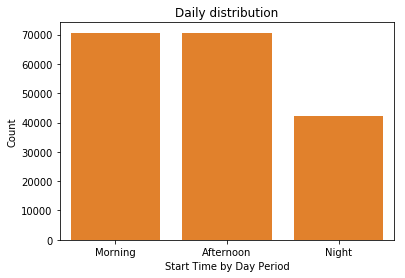

In [26]:
periodday = ['Morning', 'Afternoon', 'Night']
perioddaycat = pd.api.types.CategoricalDtype(ordered=True, categories=periodday)
df_cleaned['day_period'] = df_cleaned['day_period'].astype(perioddaycat)

base_color = sb.color_palette()[1]
countplot(df_cleaned,'day_period',xlabel='Start Time by Day Period',ylabel='Count',title='Daily distribution', color=base_color)  

#### No surprise here, most activities happen in the morning or the afternoon

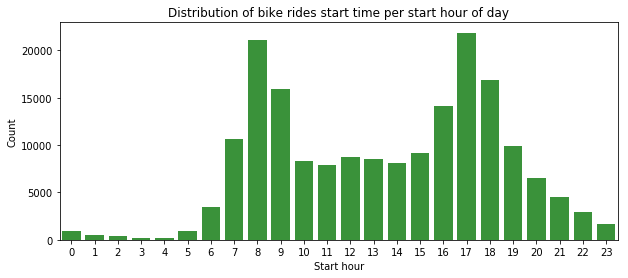

In [27]:
plt.figure(figsize=(10,4))
base_color = sb.color_palette()[2]
countplot(df_cleaned,'start_hour',xlabel='Start hour',ylabel='Count',title='Distribution of bike rides start time per start hour of day', color=base_color) 

#### 5pm is the hour with the highest count of trips. Also, we can see that hours with high count are 7am,8am,9am,4pm,6pm. And it's understanble because most activities such as school an work start or end at these times. 

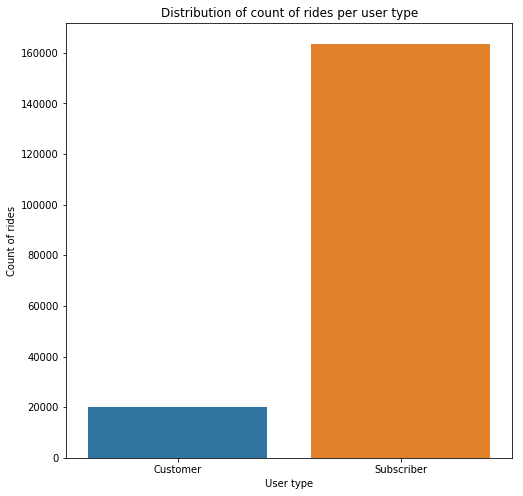

In [28]:
plt.figure(figsize=(8,8))
def countplott(data,x, xlabel=None,ylabel=None,title=None):
    
    sb.countplot(data=data, x=x)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    plt.title(title, fontsize=12)
    
countplott(df_cleaned,'user_type',xlabel='User type',ylabel='Count of rides', title='Distribution of count of rides per user type')    

#### We have more subscriber than customer

In [29]:
df_cleaned['start_station_name'].value_counts()

Market St at 10th St                                               3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)          3544
Berry St at 4th St                                                 3052
Montgomery St BART Station (Market St at 2nd St)                   2895
Powell St BART Station (Market St at 4th St)                       2760
San Francisco Ferry Building (Harry Bridges Plaza)                 2710
San Francisco Caltrain (Townsend St at 4th St)                     2703
Powell St BART Station (Market St at 5th St)                       2327
Howard St at Beale St                                              2293
Steuart St at Market St                                            2283
The Embarcadero at Sansome St                                      2082
Bancroft Way at Telegraph Ave                                      1796
Bancroft Way at College Ave                                        1770
2nd St at Townsend St                                           

In [30]:
df_cleaned['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)          4857
Market St at 10th St                                               3973
Montgomery St BART Station (Market St at 2nd St)                   3647
San Francisco Ferry Building (Harry Bridges Plaza)                 3368
Powell St BART Station (Market St at 4th St)                       2997
San Francisco Caltrain (Townsend St at 4th St)                     2947
Berry St at 4th St                                                 2872
The Embarcadero at Sansome St                                      2512
Powell St BART Station (Market St at 5th St)                       2353
Steuart St at Market St                                            2338
Howard St at Beale St                                              2034
Civic Center/UN Plaza BART Station (Market St at McAllister St)    1865
Bancroft Way at Telegraph Ave                                      1814
Beale St at Harrison St                                         

#### We have a lot of values on these two features. Let's make a top 10 of each

In [31]:
top_start = df_cleaned['start_station_name'].value_counts().index[:10]
top_end = df_cleaned['end_station_name'].value_counts().index[:10]

In [32]:
top_start_df = df_cleaned.loc[df_cleaned['start_station_name'].isin(top_start)]
top_end_df = df_cleaned.loc[df_cleaned['end_station_name'].isin(top_end)]

In [33]:
start_counts = top_start_df['start_station_name'].value_counts()
start_order = start_counts.index
end_counts = top_end_df['end_station_name'].value_counts()
end_order = end_counts.index

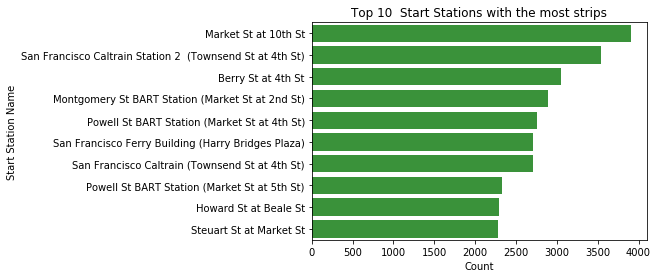

In [34]:
base_color = sb.color_palette()[2]
sb.countplot(data=top_start_df, y='start_station_name', color=base_color, order=start_order)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 10  Start Stations with the most strips');

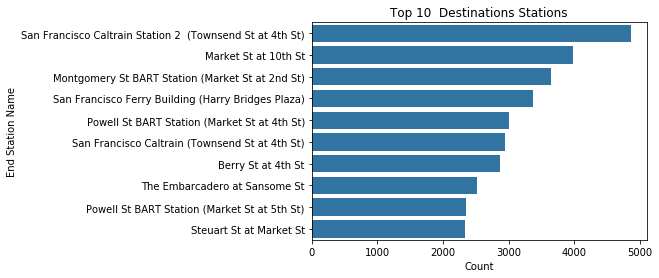

In [35]:
base_color = sb.color_palette()[0]
sb.countplot(data=top_end_df, y='end_station_name', color=base_color, order=end_order)
plt.xlabel('Count')
plt.ylabel('End Station Name')
plt.title('Top 10  Destinations Stations');

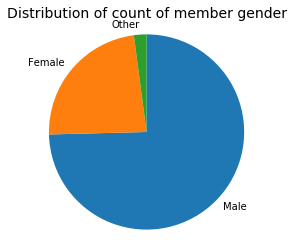

In [36]:
gender_counts = df_cleaned['member_gender'].value_counts()

plt.pie(gender_counts, labels = gender_counts.index, startangle = 90, counterclock = False);
plt.axis('square');
plt.title('Distribution of count of member gender', fontsize=14);

#### Most of users are Male. I will plot it again on a countplot to make it more understandable

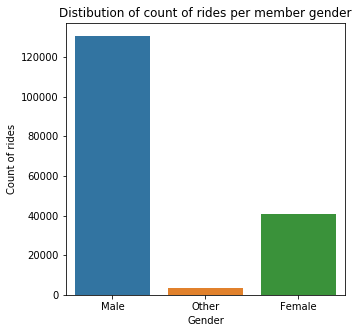

In [37]:
plt.figure(figsize=(5,5))
countplott(df_cleaned,'member_gender', xlabel='Gender',ylabel='Count of rides',title='Distibution of count of rides per member gender')

Text(0.5,1,'Distribution of count of Age')

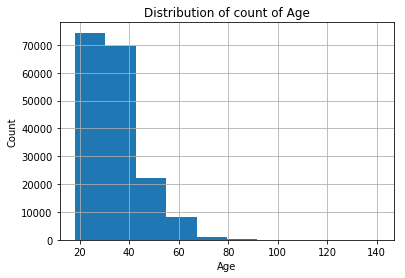

In [38]:
df_cleaned['age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of count of Age')

#### The distribution is clearly right skewed , surely because of some outliers

#### Now, since i only choose top 10 ten start and end station, i will do exploring on each of them 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


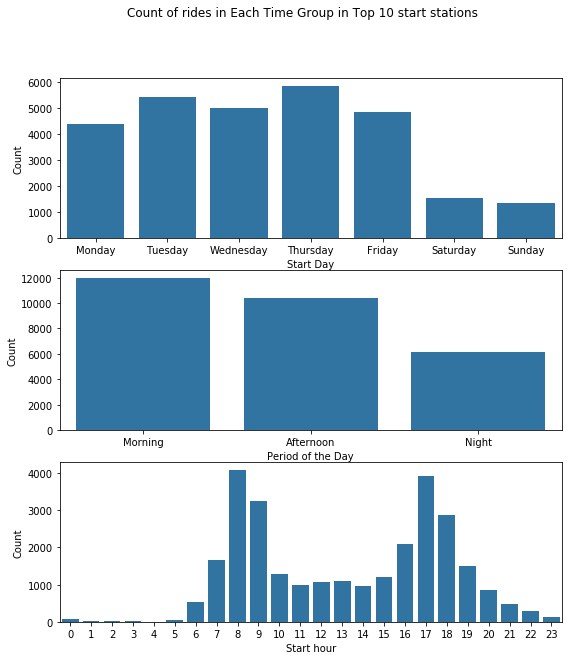

In [39]:
weekyday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekydaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekyday)
top_start_df['start_day'] = top_start_df['start_day'].astype(weekydaycat)

periodday = ['Morning', 'Afternoon', 'Night']
perioddaycat = pd.api.types.CategoricalDtype(ordered=True, categories=periodday)
top_start_df['day_period'] = top_start_df['day_period'].astype(perioddaycat)

base_color = sb.color_palette()[0]
def countplottt(data,color=base_color, title=None):
    
    fig, ax = plt.subplots(nrows=3, figsize = [9,10])
    base_color = sb.color_palette()[0]
    sb.countplot(data = data, x = 'start_day', color = base_color, ax = ax[0])
    sb.countplot(data = data, x = 'day_period', color = base_color, ax = ax[1])
    sb.countplot(data = data, x = 'start_hour', color = base_color, ax = ax[2])
    ax[0].set_xlabel('Start Day')
    ax[0].set_ylabel('Count')
    ax[1].set_xlabel('Period of the Day')
    ax[1].set_ylabel('Count')
    ax[2].set_xlabel('Start hour')
    ax[2].set_ylabel('Count')
    fig.suptitle(title)
  
countplottt(top_start_df,color=base_color, title='Count of rides in Each Time Group in Top 10 start stations')

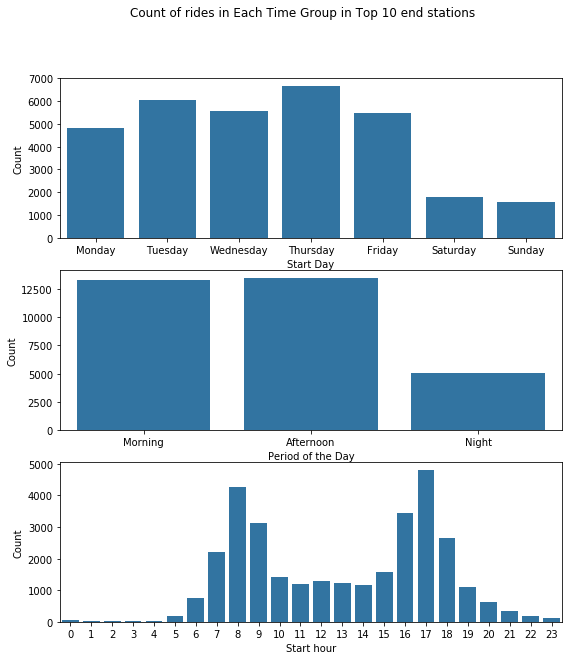

In [40]:
countplottt(top_end_df,color=base_color, title='Count of rides in Each Time Group in Top 10 end stations')

Text(0.5,1,'Distribution of count of Duration in Sec')

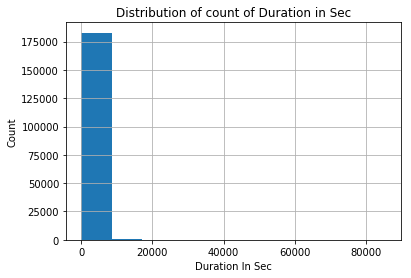

In [41]:
df_cleaned['duration_sec'].hist()
plt.xlabel('Duration In Sec')
plt.ylabel('Count')
plt.title('Distribution of count of Duration in Sec')

#### The distribution of duration in sec(so the duration_min also) is right skewed, just as the age. I will use a log xscale on duration_sec, then i will try to take the outliers in duration_min since i'm planning to do some bivariate plot with this feature, so i need it to be the most relevant possible 

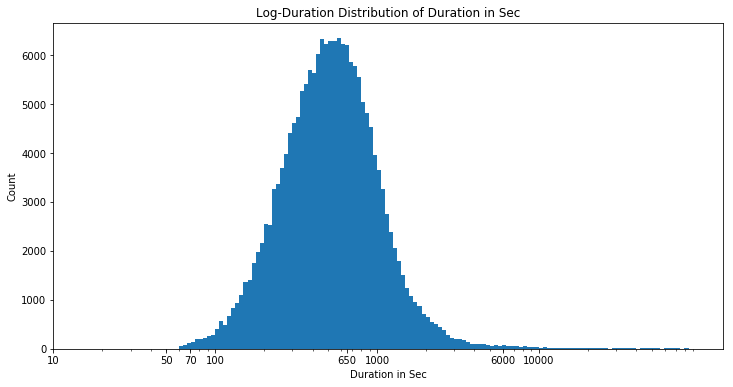

In [42]:
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(df_cleaned['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 6])
plt.hist(data = df_cleaned, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10,50,70,100,650,1000,6000,10000], [10,50,70,100,650,1000,6000,10000])
plt.xlabel('Duration in Sec')
plt.ylabel('Count')
plt.title('Log-Duration Distribution of Duration in Sec');

#### Now, we can clearly see that we have a high count of duration for trips around 650 seconds

In [43]:
quartiles = np.percentile(df_cleaned['duration_min'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74* (quartiles[2] - quartiles[0])
sig

5.8089999999999993

In [44]:
df_dff = df_cleaned.query('(duration_min > @mu - 5 * @sig) & (duration_min < @mu + 5 * @sig)')

In [45]:
df_dff['duration_min'].value_counts()

4.533333     311
5.400000     292
5.383333     291
5.100000     291
5.083333     290
6.150000     287
6.450000     286
4.566667     284
5.900000     283
6.333333     282
5.733333     281
5.416667     281
4.950000     281
5.683333     280
5.716667     280
4.483333     280
4.500000     279
5.616667     278
4.783333     277
5.650000     277
5.483333     277
5.266667     276
4.666667     276
4.966667     276
6.100000     275
5.600000     275
5.250000     275
5.283333     274
6.400000     274
4.400000     274
            ... 
31.700000      2
36.600000      2
34.033333      2
32.266667      2
35.133333      2
36.733333      2
33.533333      2
36.250000      2
34.666667      2
34.950000      2
34.766667      2
33.250000      2
34.450000      2
36.650000      2
36.316667      2
36.750000      2
34.833333      2
36.716667      2
37.000000      2
37.516667      1
37.233333      1
35.116667      1
35.700000      1
32.633333      1
37.433333      1
37.200000      1
36.083333      1
33.566667     

### I used a method found on stackoverfow about fixing a factor=5,  multiply the interquartile by 0.74 and finally remove the outliers by fixing an interval. 

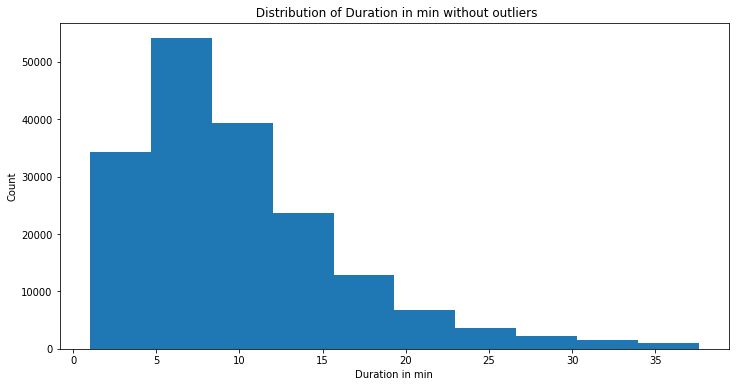

In [46]:
plt.figure(figsize=[12, 6])
plt.hist(data = df_dff, x = 'duration_min')
plt.xlabel('Duration in min')
plt.ylabel('Count')
plt.title(' Distribution of Duration in min without outliers');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

#### The univariate exploration was really intersting. We saw that most of trips are during week day and not the weekend. About the start_hour, we saw that most trips start earlier in the morning, or at 5,6,7 pm. We also used a log xscale on the duration because it was right skewed. The log transformation permit us to see clearly a normal distribution of the duration in sec and a high count for trips on 650 seconds. For the duration_min column, i removed all the outliers to make good and relevant plots in the bivariate part

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

#### Well, some data types were wrong, so i changed them so i can do right exploration and plots. I also saw that there was many start and end station names. I decided to select just top 10 of each because it will simplify my work and make my plots more clear and not overload. I also saw a gender called "other". i dropped the member_birth_year column because i created a new column with each persons age, so no need to keep the birth year. I also saw that the most high age was 141, and basically i have some people very old with more than 90. But since we can find old people but still fresh physically, i didnt drop these data. I also created new columns. These columns are relevant because they will allow me to do specific exploring and to see their impact on the trips

## Bivariate Exploration

### Let's see the relationship between the user type, gender with the duration

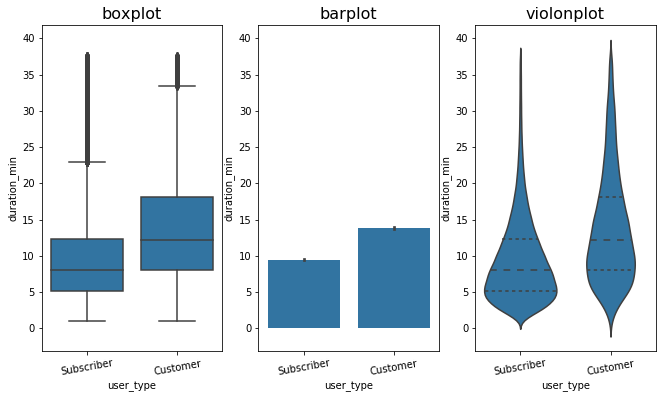

In [47]:
plt.figure(figsize = [11, 6])
base_color = sb.color_palette()[0]

def plots(data,x,y, title1, title2, title3, color=base_color):
    plt.subplot(1, 3, 3)
    ax1 = sb.violinplot(data =data, x=x, y =y, inner='quartile', color =base_color)       
    plt.xticks(rotation = 10)            
    plt.title(title1, fontsize=16);


    plt.subplot(1, 3, 2)
    sb.barplot(data = df_dff, x =x, y =y, color = base_color)
    plt.xticks(rotation = 10)
    plt.ylim(ax1.get_ylim())              
    plt.title(title2, fontsize=16);


    plt.subplot(1, 3, 1)
    sb.boxplot(data = df_dff, x =x, y =y, color = base_color)
    plt.xticks(rotation = 10)
    plt.ylim(ax1.get_ylim())              
    plt.title(title3, fontsize=16);
    
plots(df_dff,'user_type','duration_min','violonplot','barplot','boxplot', color=base_color)    

#### We can clearly see that the customers have high duration minutes than suscribers. I plot it in three different kind of plot to make my exploring more relevant .In the boxplot, we can see that we have some points above the higher whiskers, so we surely still have outliers. Surely if we change the factor, we may deal with them. So we can say if  the person is a customer, he surely have a more high duration trip 

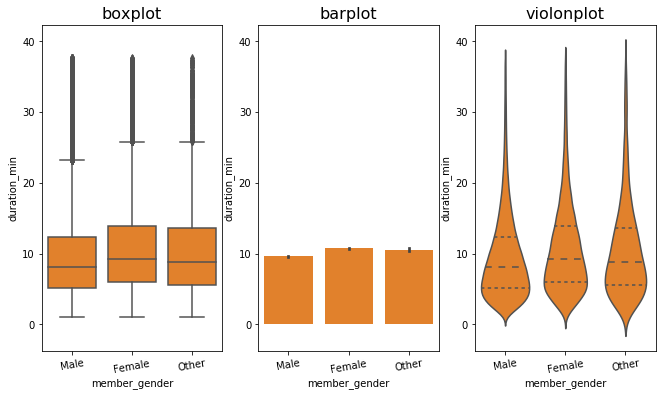

In [48]:
plt.figure(figsize = [11, 6])
base_color = sb.color_palette()[1]
plots(df_dff,'member_gender','duration_min','violonplot','barplot','boxplot', color=base_color)

#### For the gender, Women have the high duration minutes. Maybe because they go slowly(LOL)  

### Let's look at the relationship between top 10  end station name and duration_min

In [49]:
topp_end = top_end_df.groupby('end_station_name').count()
endd_order = topp_end.sort_values('duration_sec', ascending = False).index

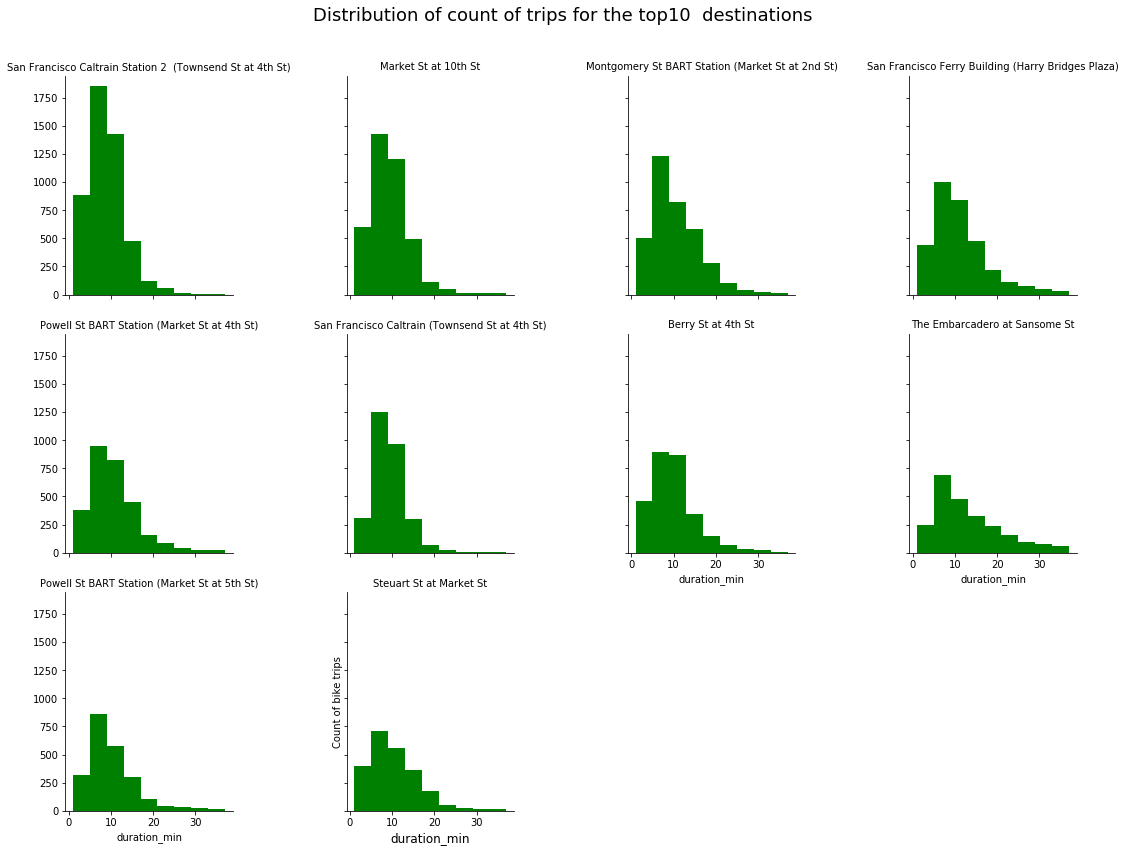

In [50]:
g = sb.FacetGrid(data = top_end_df, col = 'end_station_name', col_wrap = 4, size = 4, col_order = endd_order, sharey=True)

g.map(plt.hist, 'duration_min', bins = np.arange(df_dff['duration_min'].min(), df_dff['duration_min'].max()+1, 4), color='green')
plt.ylabel('Count of bike trips')
plt.xlabel('duration_min', fontsize=12)
g.set_titles('{col_name}');

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of count of trips for the top10  destinations', fontsize=18);

#### With these plots, we can see that the destination with the highest duration is the Embarcadero at Sansome St , and the destination with the lowest duration is San Franciso Caltrain Station 2

#### Let's look at the relationship between user type and the top10 start station name and the age of the user. Also the relationship

Text(0.5,1,'Log fonction on Age Distribution in Top 10 Start Stations name')

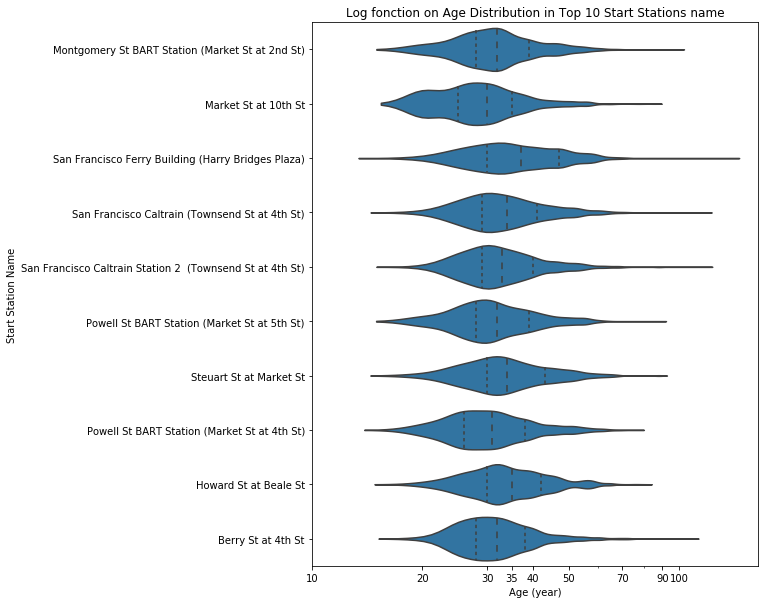

In [51]:
plt.figure(figsize=(8,10))
base_color = sb.color_palette()[0]
sb.violinplot(data=top_start_df, y='start_station_name', x='age', inner='quartile', color=base_color)
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,90,100], [10,20,30,35,40,50,70,90,100])
plt.ylabel('Start Station Name')
plt.xlabel('Age (year)')
plt.title('Log fonction on Age Distribution in Top 10 Start Stations name')

#### We can see that most users are between 30,40 years old, probably workers

### Correlation between Age and duration_sec for top10 start stations names

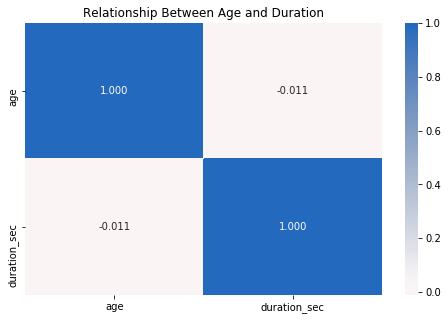

In [52]:
correlation_vars = ['age','duration_sec']
plt.figure(figsize = [8, 5])
sb.heatmap(top_start_df[correlation_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Relationship Between Age and Duration');

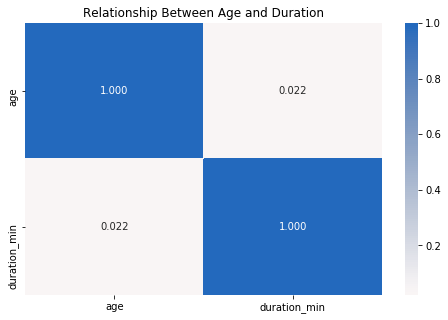

In [53]:
correlation_vars = ['age','duration_min']
plt.figure(figsize = [8, 5])
sb.heatmap(df_dff[correlation_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Relationship Between Age and Duration');

### Negative correlation between age and  duration_sec in top10 start stations name. But with the duration_min without iutliers, the correlation is positive

#### Let's see the relationship between the  start_day, day_period and the user_type

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


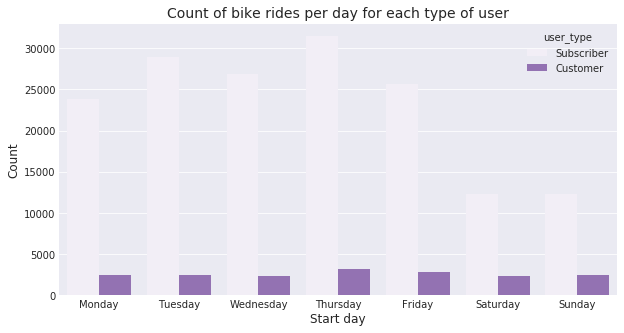

In [54]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_dff['start_day'] = df_dff['start_day'].astype(weekdaycat)

plt.figure(figsize=(10,5))
base_color = sb.color_palette()[4]

def bicountplot(data, x, hue, xlabel=None, ylabel=None, title=None, color=base_color):
    sb.set_style('darkgrid')
    sb.countplot(data=data, x=x, hue=hue, color=color)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14);
    
bicountplot(df_dff, 'start_day', 'user_type', xlabel='Start day', ylabel='Count', title='Count of bike rides per day for each type of user', color=base_color)    

#### Even if highest count of customers start  on Monday, we can see the count is mostly the same during the week. But for subscribers, the count is more during the week day than the weekend

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


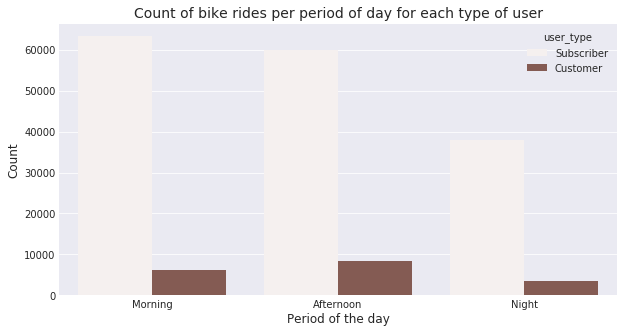

In [55]:
periodday = ['Morning', 'Afternoon', 'Night']
perioddaycat = pd.api.types.CategoricalDtype(ordered=True, categories=periodday)
df_dff['day_period'] = df_dff['day_period'].astype(perioddaycat)
plt.figure(figsize=(10,5))
base_color = sb.color_palette()[5]
bicountplot(df_dff, 'day_period', 'user_type', xlabel='Period of the day', ylabel='Count', title='Count of bike rides per period of day for each type of user', color=base_color)  

#### customers mostly rides in the afternoon, morning then night.But for subscribers, it's Morning, Afternoon, Night

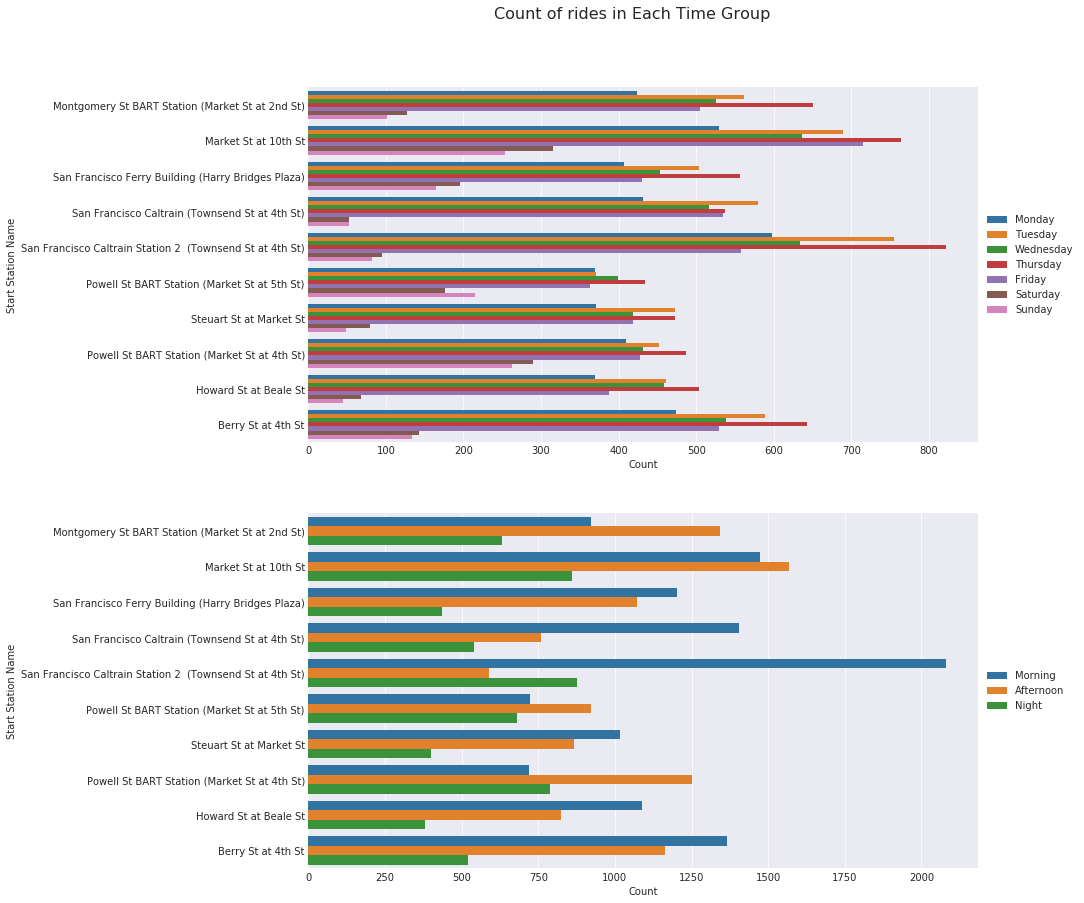

In [56]:
vars_s=['start_day','day_period']
fig = plt.figure(figsize=(12,14))
plt.subplots_adjust(top=0.9)
fig.suptitle('Count of rides in Each Time Group', fontsize=16)
for i in range(1, 3):
    ax = fig.add_subplot(2, 1, i)
    sb.countplot(data=top_start_df, y='start_station_name', hue=vars_s[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.ylabel('Start Station Name')
    plt.xlabel('Count');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

#### We saw that women have the highest duration trips than the men and others. The duration trips of customers is more high than subscribers. Also, the destination with the highest duration trip is Embarcadero at Sansome St and San Francisco Caltrain Station 2 has the lowest. Age and duration_sec have negative correlation, but with the duration without some outliers, the correlation is positive. Here, we can see the importance about removing all outliers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

#### In top10 start stations name, users age is between 30-40. Most of customers start trips on Monday and the number is mostly the same  during all the week. For subscribers, trips are less during the weekend than the week days. Propably because they mostly work or go to school. For customers, trips happen more in the afternoon, then morning and then night. For subscribers, it's morning, afternoon , then night. After, i did some plots about top10 start stations 

## Multivariate Exploration

#### Relationship between start_day, user_type and duration_min

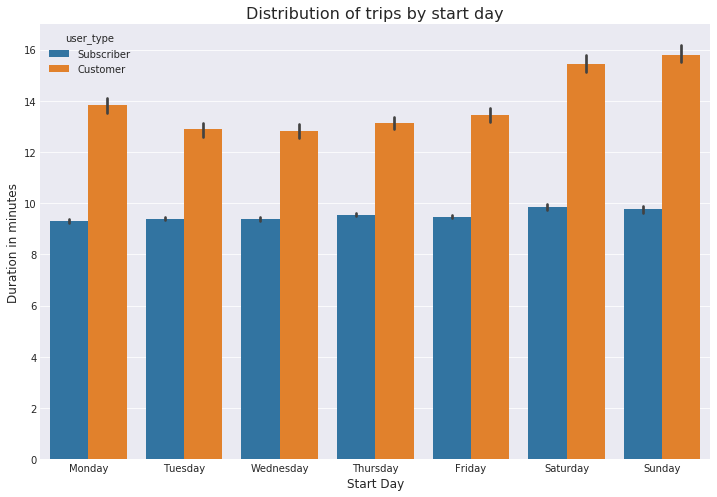

In [57]:
plt.figure(figsize=(12, 8))
def bar_plot(data,x,y,hue,xlabel=None,ylabel=None,title=None, color=None):
    sb.barplot(data=data, x=x, y=y, hue=hue, color=color)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=16);
    
bar_plot(df_dff,'start_day','duration_min','user_type',xlabel='Start Day',ylabel='Duration in minutes',title='Distribution of trips by start day', color=None)    

#### For subscribers, the saturday have the high trip duration, monday with the low one. For customers, the high trip duration is on Sunday, and wednesday with the low one

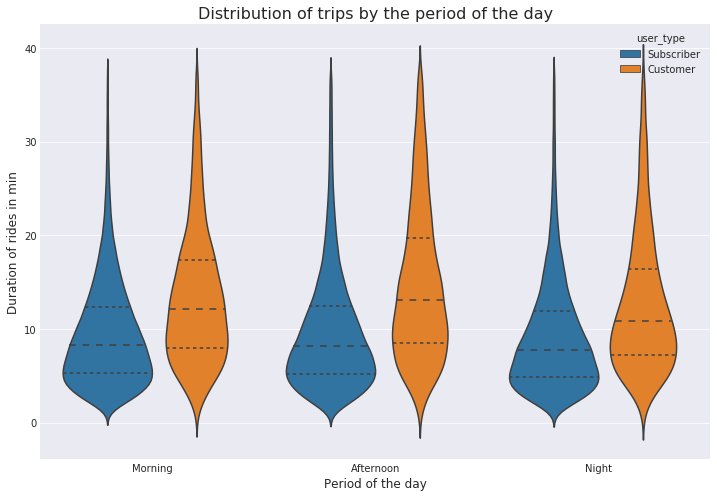

In [58]:
plt.figure(figsize=(12, 8))
sb.violinplot(data=df_dff, x='day_period', y='duration_min',inner='quartile', hue='user_type')
plt.xlabel('Period of the day', fontsize=12)
plt.ylabel('Duration of rides in min', fontsize=12)
plt.title("Distribution of trips by the period of the day", fontsize=16);

#### For customers and subcribers, the high rides duration happen during afternoon, and low ones during the night

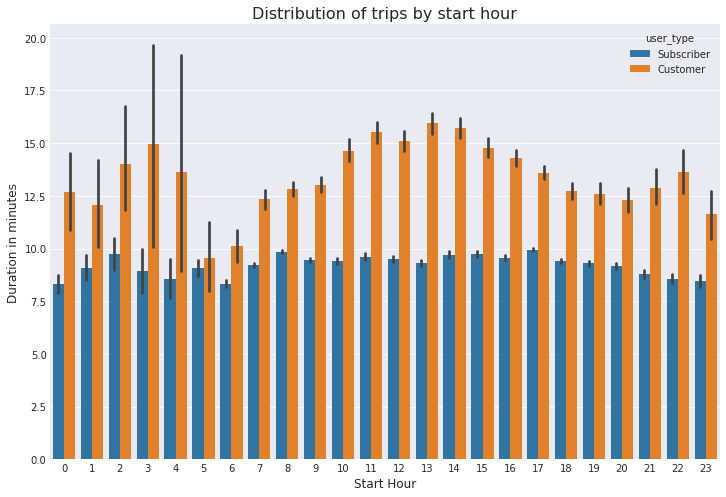

In [59]:
plt.figure(figsize=(12, 8))
bar_plot(df_dff,'start_hour','duration_min','user_type',xlabel='Start Hour',ylabel='Duration in minutes',title='Distribution of trips by start hour', color=None)    

#### For both customers and subscribers,  we can that from 6 am, the duration increases

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0.98,'Hourly usage during a week for customers and subscribers')

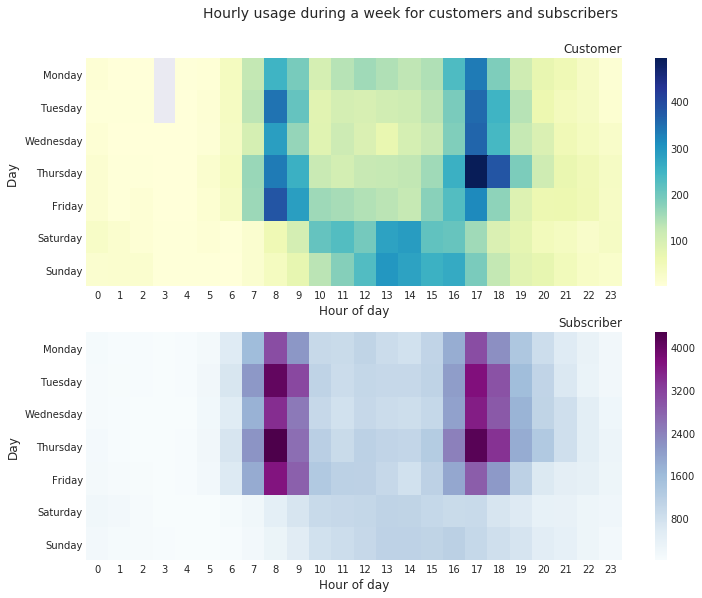

In [60]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_dff['start_day'] = df_dff['start_day'].astype(weekdaycat)
plt.figure(figsize=(12,9))

plt.subplot(2, 1, 1)
customers_df = df_dff.query('user_type == "Customer"')
customers_counts = customers_df.groupby(['start_day', 'start_hour']).size()
customers_counts = customers_counts.reset_index(name='count')
customers_counts = customers_counts.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(customers_counts, cmap="YlGnBu");
plt.title('Customer', loc='right', fontsize=12);
plt.xlabel('Hour of day', fontsize=12);
plt.ylabel('Day ', fontsize=12);

plt.subplot(2, 1, 2)
subscribers_df = df_dff.query('user_type == "Subscriber"')
subscribers_counts = subscribers_df.groupby(['start_day', 'start_hour']).size()
subscribers_counts = subscribers_counts.reset_index(name='count')
subscribers_counts = subscribers_counts.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(subscribers_counts, cmap="BuPu");
plt.title('Subscriber', loc='right', fontsize=12);
plt.xlabel('Hour of day', fontsize=12);
plt.ylabel('Day', fontsize=12);

plt.subplots_adjust(top=0.9)
plt.suptitle('Hourly usage during a week for customers and subscribers', fontsize=14)

#### As we can see, customers are a lot during the week days(monday to friday) and mostly on thrusday and their hours are 7-8am and 5-6-7 pm. But number of customers during the weekend is also non negligible
#### For subscribers, the traffic during the weekend is negligible. But they are very active during the week days from 8-9am and 5-6pm

### Now, i want to see about some plots about the top10 start and end stations

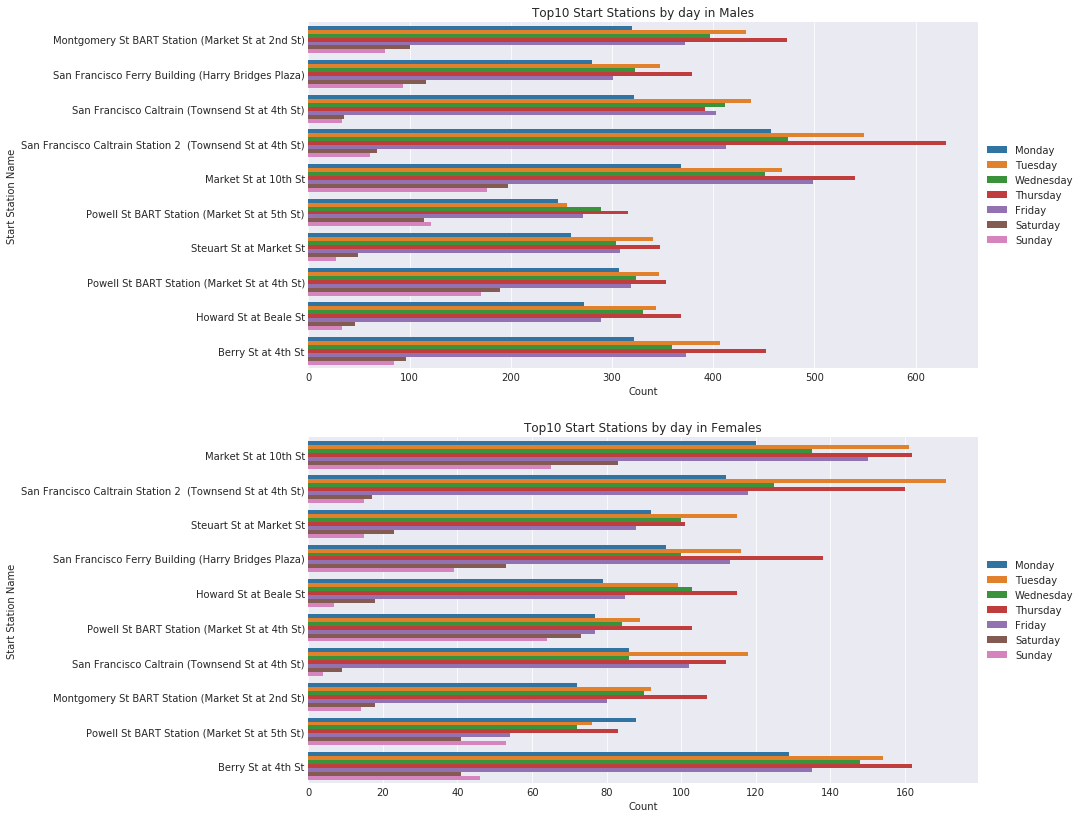

In [61]:
male_df = top_start_df.query('member_gender == "Male"')
female_df = top_start_df.query('member_gender == "Female"')
plt.figure(figsize=(12,14))
ax = plt.subplot(2,1,1)
sb.countplot(data=male_df, y='start_station_name', hue='start_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top10 Start Stations by day in Males')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

ax = plt.subplot(2,1,2)
sb.countplot(data=female_df, y='start_station_name', hue='start_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top10 Start Stations by day in Females')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

#### Highest ones are on thrusday and lowest one on sunday for most of top10 start stations

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


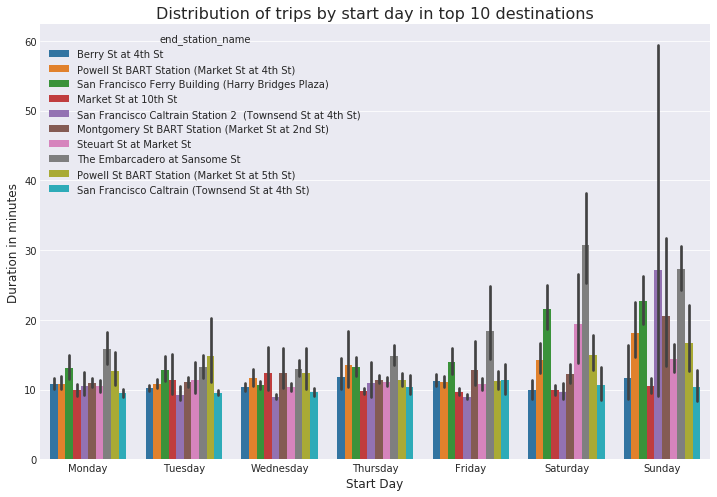

In [62]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
top_end_df['start_day'] = top_end_df['start_day'].astype(weekdaycat)

plt.figure(figsize=(12, 8))
bar_plot(top_end_df,'start_day','duration_min','end_station_name',xlabel='Start Day',ylabel='Duration in minutes',title='Distribution of trips by start day in top 10 destinations', color=None)    

#### This plot just confirm what we said about the destinations with the highest duration in min and the lowest one

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'End Station Name')

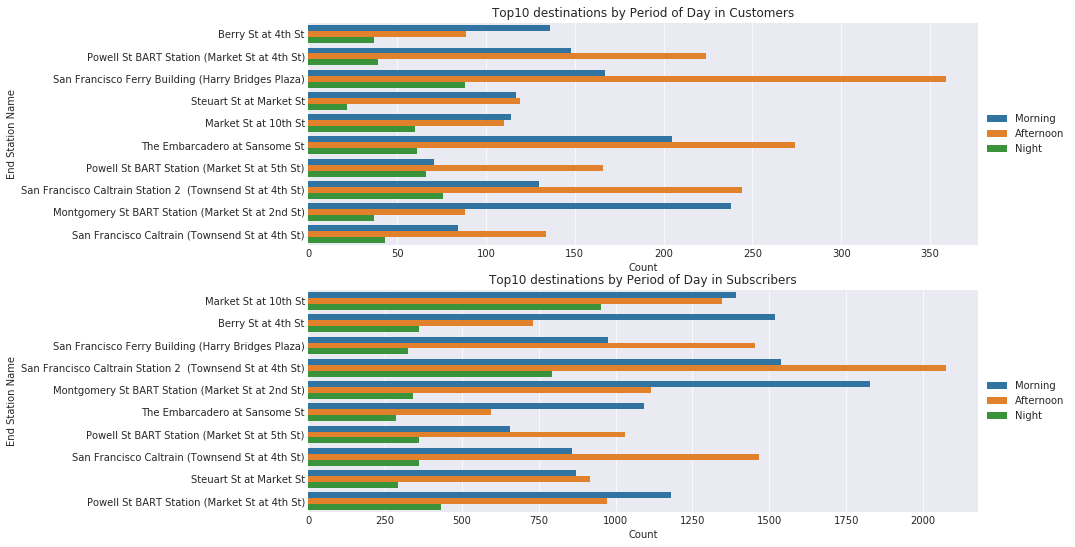

In [63]:
top_endcus = top_end_df.query('user_type == "Customer"')
top_endsub = top_end_df.query('user_type == "Subscriber"')
plt.figure(figsize=(12,9))
plt.subplot(2, 1, 1)
ax = plt.subplot(2,1,1)
sb.countplot(data=top_endcus, y='end_station_name', hue='day_period')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top10 destinations by Period of Day in Customers')
plt.xlabel('Count')
plt.ylabel('End Station Name')


ax=plt.subplot(2, 1, 2)
sb.countplot(data=top_endsub, y='end_station_name', hue='day_period')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top10 destinations by Period of Day in Subscribers')
plt.xlabel('Count')
plt.ylabel('End Station Name')

#### As we can see in top10 destinations, it's mostly in the afternoon, then morning and then night

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

#### In this part, making specific plots was very benefic. I mean that separating user_type made me see the impact of each on the ride duration . And these plots confirm with accuracy some hypoyhesis i made earlier. So, subscriber are mostly people with some permanent activities and customers are people who ocasionally ride or for some quick stuff to do.

### Were there any interesting or surprising interactions between features?

#### Despite the differencies between custimers abs subsceibers, we can see that they approxilatiavly start the ride at the same time. 


## Conclusions
### This project was really interesting. Making such plots is amazing and display corectly the relationship between features. But in our dataset, we only work on one month ,February, and we also have some outliers. A better clean and more dataset would make it again more attarctive
